In [1]:
import numpy as np
# rand(d0, d1, ..., dn) 用来生成d0xd1x...dn维的数组。数组的值在[0,1)之间
np.random.rand(3,2,2)


array([[[0.32431682, 0.89236281],
        [0.69792339, 0.69949221]],

       [[0.77584866, 0.89227739],
        [0.26928367, 0.93231958]],

       [[0.14557665, 0.55159144],
        [0.08984571, 0.39286827]]])

In [2]:
# N(0,1)的标准正态分布
np.random.randn(3,2)

array([[-0.4530216 , -0.13874231],
       [ 0.62757395, -1.21796369],
       [-0.17488873,  0.37091179]])

In [3]:
# 生成N(μ,σ2)的正态分布，只需要在randn上每个生成的值x上做变换σx+μ即可
# 生成N（1,4）
2*np.random.randn(3,2) + 1

array([[ 1.5015098 ,  0.34049992],
       [ 0.39906237,  2.4599448 ],
       [-1.86715181,  2.41925554]])

In [4]:
# randint(low,high, [size])，生成随机的大小为size的数据，size可以为整数，为矩阵维数，或者张量的维数。值位于半开区间 [low, high)。
# np.random.randint(3, size=[2,3,4])返回维数为2x3x4的数据。取值范围为最大值为3的整数。
np.random.randint(3, size=[2,3,4])

array([[[1, 0, 0, 1],
        [0, 0, 1, 1],
        [2, 0, 0, 0]],

       [[0, 0, 2, 0],
        [0, 1, 2, 2],
        [2, 1, 1, 2]]])

In [5]:
# np.random.randint(3, 6, size=[2,3]) 返回维数为2x3的数据。取值范围为[3,6).
np.random.randint(3, 6, size=[2,3])


array([[3, 5, 4],
       [5, 4, 3]])

In [ ]:
# random_integers(low[, high, size]),和上面的randint类似，区别在与取值范围是闭区间[low, high]。

In [ ]:
# random_sample([size]), 返回随机的浮点数，在半开区间 [0.0, 1.0)。如果是其他区间[a,b),可以加以转换(b - a) * random_sample([size]) + a



2. scikit-learn随机数据生成API介绍
　　　　scikit-learn生成随机数据的API都在datasets类之中，和numpy比起来，可以用来生成适合特定机器学习模型的数据。常用的API有：

　　　　1) 用make_regression 生成回归模型的数据

　　　　2) 用make_hastie_10_2，make_classification或者make_multilabel_classification生成分类模型数据

　　　　3) 用make_blobs生成聚类模型数据

　　　　4) 用make_gaussian_quantiles生成分组多维正态分布的数据


3.1 回归模型随机实例

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_regression
# X为样本特征，y为样本输出， coef为回归系数，共1000个样本，每个样本1个特征
# n_samples生成样本数，n_features（样本特征数），noise（样本随机噪音）和coef（是否返回回归系数）
X, y, coef =make_regression(n_samples=1000, n_features=1,noise=10, coef=True)
# 画图
plt.scatter(X, y,  color='black')
plt.plot(X, X*coef, color='blue',
         linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

这里我们用make_classification生成三元分类模型数据。几个关键参数有n_samples（生成样本数）， n_features（样本特征数）， n_redundant（冗余特征数）和n_classes（输出的类别数）

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_classification
# X1为样本特征，Y1为样本类别输出， 共400个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
X1, Y1 = make_classification(n_samples=400, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.show()


聚类
这里我们用make_blobs生成聚类模型数据。几个关键参数有n_samples（生成样本数）， n_features（样本特征数），centers(簇中心的个数或者自定义的簇中心)和cluster_std（簇数据方差，代表簇的聚合程度）

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共3个簇，簇中心在[-1,-1], [1,1], [2,2]， 簇方差分别为[0.4, 0.5, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [1,1], [2,2]], cluster_std=[0.4, 0.5, 0.2])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

**分组正态分布混合数据**
我们用make_gaussian_quantiles生成分组多维正态分布的数据。几个关键参数有n_samples（生成样本数）， n_features（正态分布的维数），mean（特征均值）， cov（样本协方差的系数）， n_classes（数据在正态分布中按分位数分配的组数）

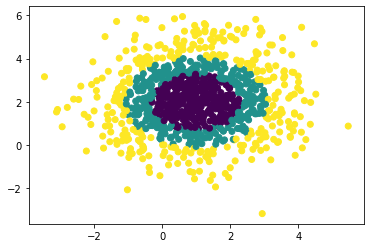

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_gaussian_quantiles
#生成2维正态分布，生成的数据按分位数分成3组，1000个样本,2个样本特征均值为1和2，协方差系数为2
X1, Y1 = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=3, mean=[1,2],cov=2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)